In [1]:
from utils import *
import pandas as pd
import numpy as np
import datetime
import os

os.chdir('C:/Users/howar/Desktop/Coursework/ME4-Individual-Project-Volatility-Forecasting')

# Data processing

In [26]:
r = pd.read_csv('data/intraday_returns.csv', index_col=0, parse_dates=True)
daily = pd.read_csv('data/daily_returns.csv', index_col=0, parse_dates=True)

cov = r.groupby(r.index.date).apply(compute_covariance).droplevel(0)
daily = daily[daily.index.isin(cov.index.get_level_values(0))]

In [27]:
daily_test = daily.shift(-1)

In [29]:
from scipy.optimize import fmin_slsqp

cov_arr = cov.values.reshape((-1, 12, 12))

def min_func(weights, cov):
    return np.sqrt(weights.dot(cov).dot(weights.T))



array([[[ 5.54263402e-05,  1.71641870e-05,  1.26151914e-05, ...,
          1.63756302e-05,  1.76101273e-05,  1.71994831e-05],
        [ 1.71641870e-05,  8.27436303e-05,  1.14912696e-05, ...,
          4.29329064e-05,  3.81324930e-05,  2.25964206e-05],
        [ 1.26151914e-05,  1.14912696e-05,  7.09660018e-05, ...,
          4.21732514e-06, -1.46729214e-06,  1.46739130e-05],
        ...,
        [ 1.63756302e-05,  4.29329064e-05,  4.21732514e-06, ...,
          1.29978091e-04,  3.58212973e-05,  4.07496173e-05],
        [ 1.76101273e-05,  3.81324930e-05, -1.46729214e-06, ...,
          3.58212973e-05,  8.38336219e-05,  2.79000387e-05],
        [ 1.71994831e-05,  2.25964206e-05,  1.46739130e-05, ...,
          4.07496173e-05,  2.79000387e-05,  1.09523743e-04]],

       [[ 5.34134688e-05,  1.30704037e-05,  1.30830913e-05, ...,
          1.45905435e-05,  2.01572960e-05,  2.64997167e-05],
        [ 1.30704037e-05,  6.90259061e-05,  1.60976936e-05, ...,
          1.76816243e-05,  3.87400620e

Final Portfolio Value: $146.1
Overall Return (%): 46.13
Sharpe Ratio: 3.6
Sortino Ratio: 4.69


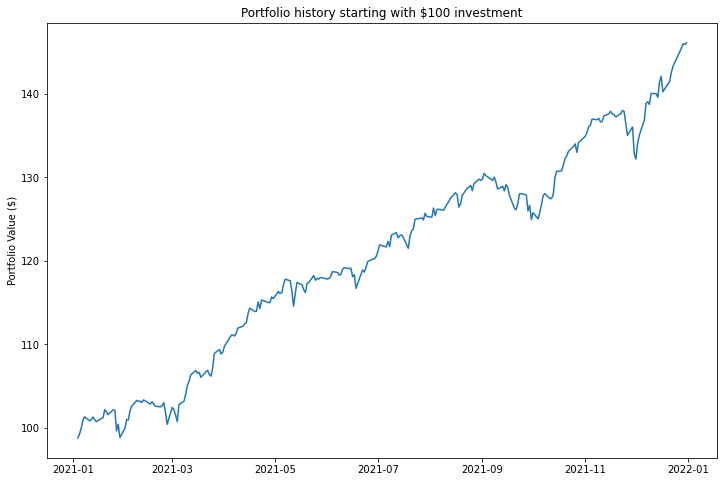

In [9]:
port.metrics()

In [6]:
import yfinance as yf

sp = yf.download('SPY', start='2021-01-01', end='2021-12-31', auto_adjust=True)['Close']
r_sp = 100 * (sp.pct_change(1) + 1).cumprod()

[*********************100%***********************]  1 of 1 completed


In [7]:
r_port = port.portfolio_log_returns
r_sp = np.log(sp / sp.shift(1)).dropna()

<AxesSubplot:xlabel='Date'>

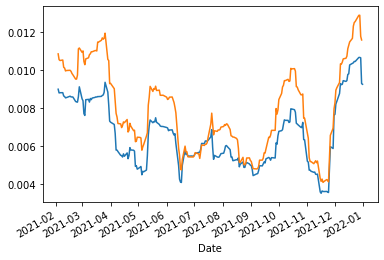

In [8]:
r_port.rolling(22).std().plot()
r_sp.rolling(22).std().plot()